<a href="https://colab.research.google.com/github/EJoelCM/Challenge1_DS_AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tiendas = [tienda1,tienda2,tienda3,tienda4]

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [81]:
tienda1.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [2]:
def ingreso_total(tienda,k=1):
  total = sum(tienda['Precio'])/k
  return total

In [3]:
tienda_ingresos = list(ingreso_total(tiendas[i],1000000) for i in range(len(tiendas)))
tiendas_nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

df_ventaTotal = pd.DataFrame(zip(tiendas_nombres,tienda_ingresos), columns= ['Tienda','Venta (millones)'])
df_ventaTotal

,Tienda,Venta (millones)
0,Tienda 1,1150.8804
1,Tienda 2,1116.3435
2,Tienda 3,1098.0196
3,Tienda 4,1038.3757


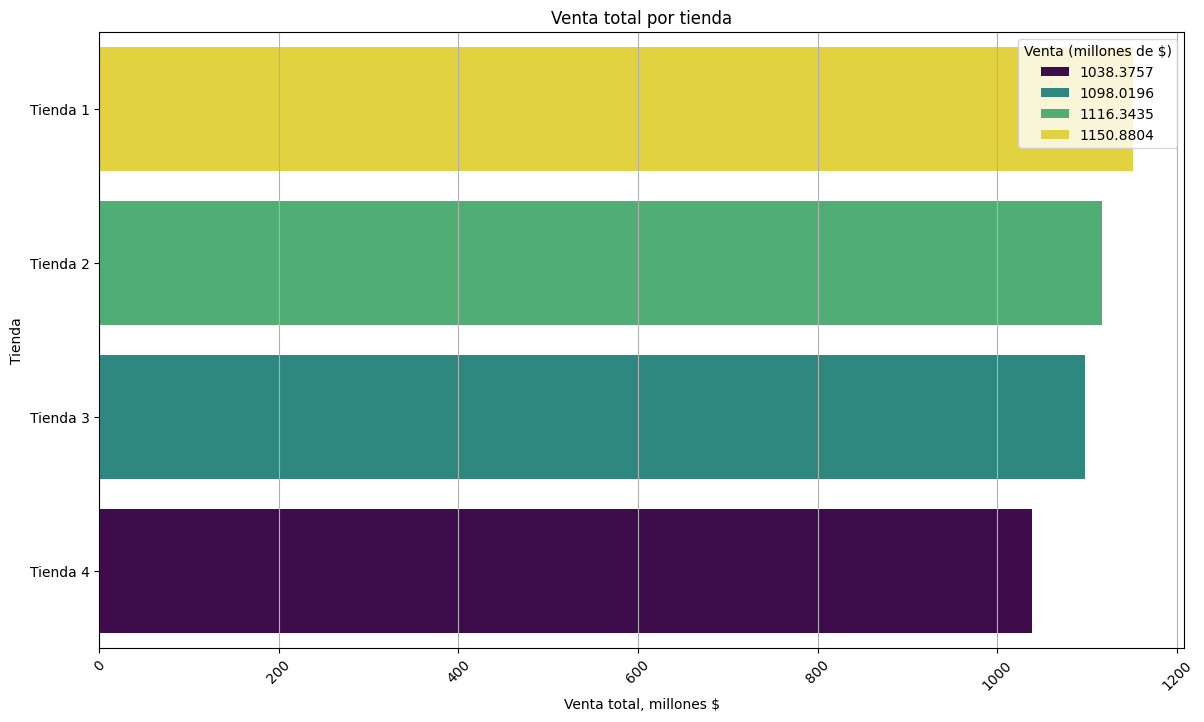

In [4]:
plt.figure(figsize=(14,8))
sns.barplot(y= df_ventaTotal['Tienda'] ,x= df_ventaTotal['Venta (millones)'], data= df_ventaTotal , palette='viridis', hue=df_ventaTotal['Venta (millones)'])
plt.xticks(rotation=45)
plt.ylabel('Tienda')
plt.xlabel('Venta total, millones $')
plt.title('Venta total por tienda')
plt.legend(title='Venta (millones de $)')
plt.grid(axis='x')
plt.show()

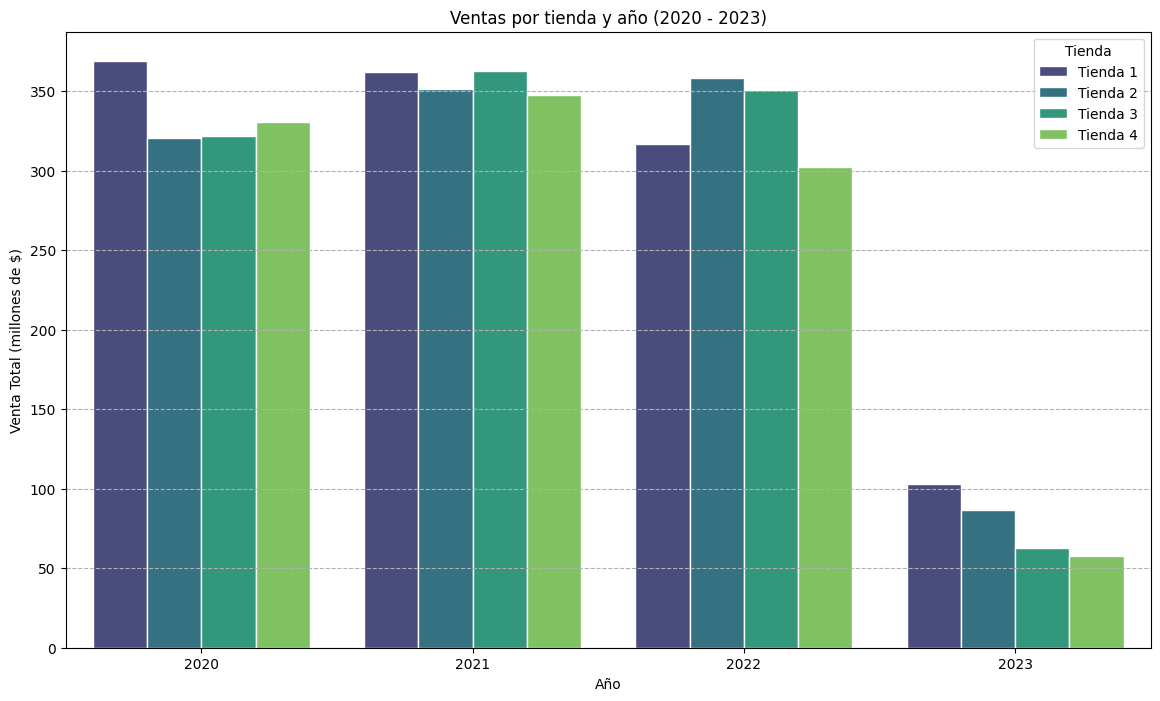

In [5]:
todas_tiendas = pd.concat(tiendas, keys=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], names=['Tienda'])
todas_tiendas['Fecha de Compra'] = pd.to_datetime(todas_tiendas['Fecha de Compra'], format='%d/%m/%Y')
todas_tiendas['Año'] = todas_tiendas['Fecha de Compra'].dt.year
ventas_por_tienda_año = todas_tiendas.groupby(['Tienda', 'Año'])['Precio'].sum().reset_index()
ventas_por_tienda_año.columns = ['Tienda', 'Año', 'Venta Total']
ventas_por_tienda_año['Venta Total'] = ventas_por_tienda_año['Venta Total'] / 1000000

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Año', y='Venta Total', hue='Tienda', data=ventas_por_tienda_año, palette='viridis', edgecolor = 'white')
plt.title('Ventas por tienda y año (2020 - 2023)')
plt.xlabel('Año')
plt.ylabel('Venta Total (millones de $)')
plt.legend(title='Tienda')
plt.grid(axis='y', linestyle= '--')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.show()

# 2. Ventas por categoría

In [7]:
def ventas_categoria(tienda):
  top5 = tienda['Categoría del Producto'].value_counts().sort_values(ascending=False)
  lista = [
      (top5.index[i] , int(top5.values[i]))
      for i in range(len(top5))
  ]
  return lista

In [8]:
ventas_tiendas_categorias = []

for i in range(4):
  ventas_tiendas_categorias.append(ventas_categoria(tiendas[i]))

datos = {}
for i, tienda in enumerate(ventas_tiendas_categorias, 1):
    for categoria, cantidad in tienda:
        if categoria not in datos:
            datos[categoria] = {}
        datos[categoria][f'Tienda {i}'] = cantidad

df_ventas_categorias = pd.DataFrame(datos).T.fillna(0).astype(int)
df_ventas_categorias.index.name = 'Categoría'
df_ventas_categorias


,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría,,,,
Muebles,465,442,499,480
Electrónicos,448,422,451,451
Juguetes,324,313,315,338
Electrodomésticos,312,305,278,254
Deportes y diversión,284,275,277,277
Instrumentos musicales,182,224,177,170
Libros,173,197,185,187
Artículos para el hogar,171,181,177,201


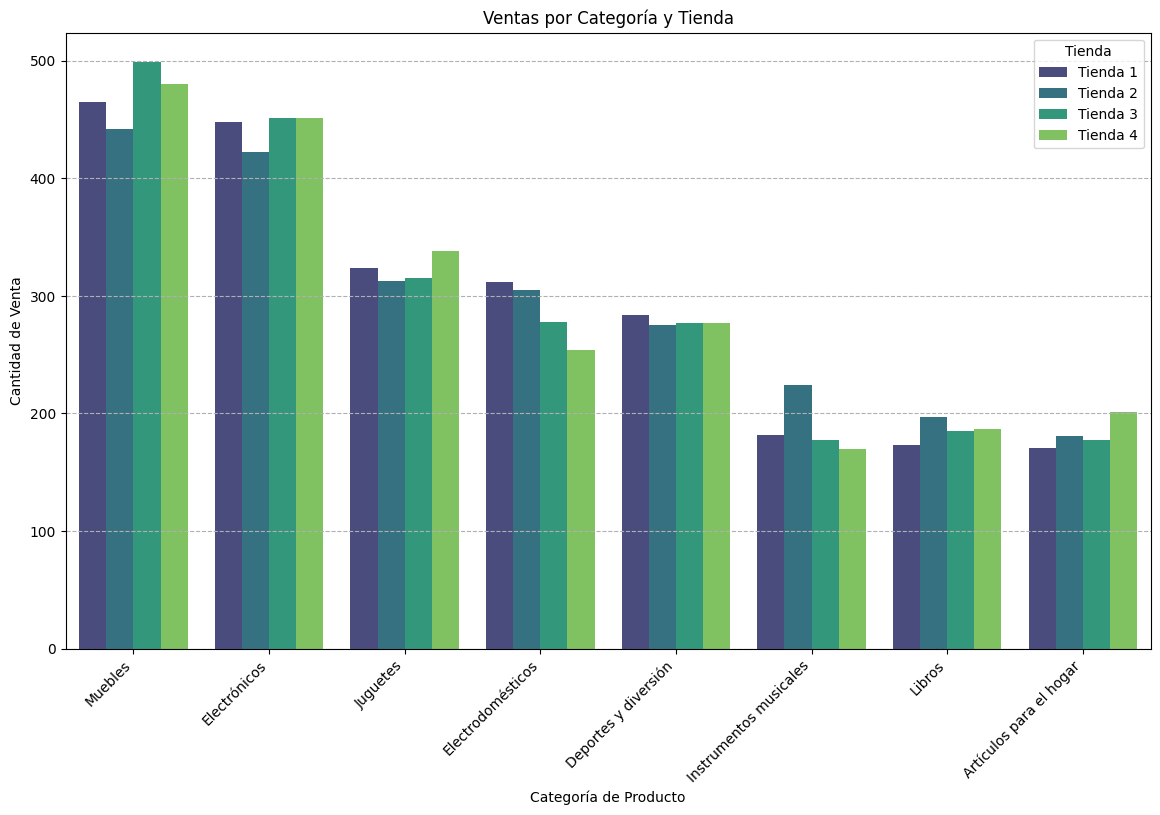

In [9]:
df_melted = df_ventas_categorias.reset_index().melt(id_vars=['Categoría'], var_name='Tienda', value_name='Ventas')
plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='Categoría', y='Ventas', hue='Tienda', palette='viridis')
plt.xlabel("Categoría de Producto")
plt.ylabel('Cantidad de Venta')
plt.xticks(rotation=45, ha='right')
plt.legend(title="Tienda")
plt.grid(axis='y', linestyle= '--')
plt.title("Ventas por Categoría y Tienda")

plt.show()

# 3. Calificación promedio de la tienda


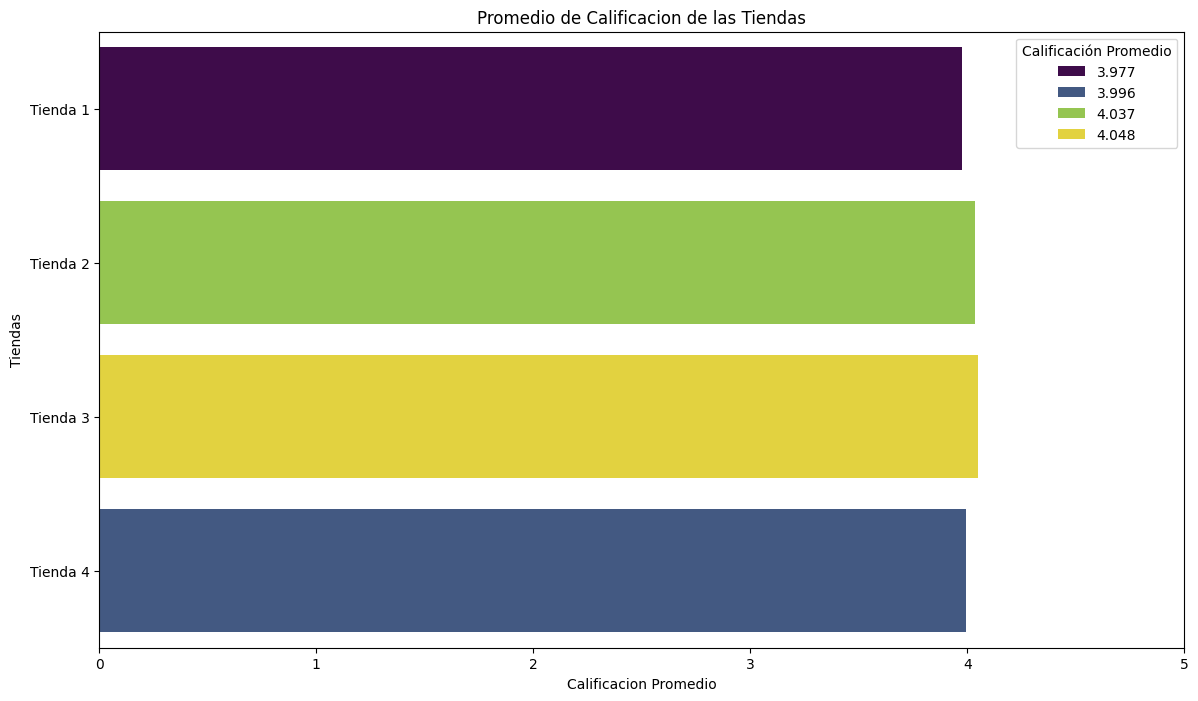

In [10]:
calificaciones_promedio = [tienda1['Calificación'].mean(),tienda2['Calificación'].mean(),tienda3['Calificación'].mean(),tienda4['Calificación'].mean()]
df_calificaciones_promedio = pd.DataFrame(calificaciones_promedio, columns = ['Calificacion Promedio'], index = tiendas_nombres)

plt.figure(figsize=(14, 8))
ax = sns.barplot(data = df_calificaciones_promedio, x = df_calificaciones_promedio['Calificacion Promedio'], y = df_calificaciones_promedio.index, hue = 'Calificacion Promedio', palette = 'viridis')
# Obtener los handles y labels de la leyenda
handles, labels = ax.get_legend_handles_labels()
# Redondear los labels (valores numéricos)
labels = [round(float(label), 3) for label in labels]
# Actualizar la leyenda con los labels redondeados
plt.legend(handles, labels, title="Calificación Promedio")
plt.ylabel('Tiendas')
plt.title('Promedio de Calificacion de las Tiendas')
plt.xlim(0,5)

plt.show()

<Figure size 1400x800 with 0 Axes>

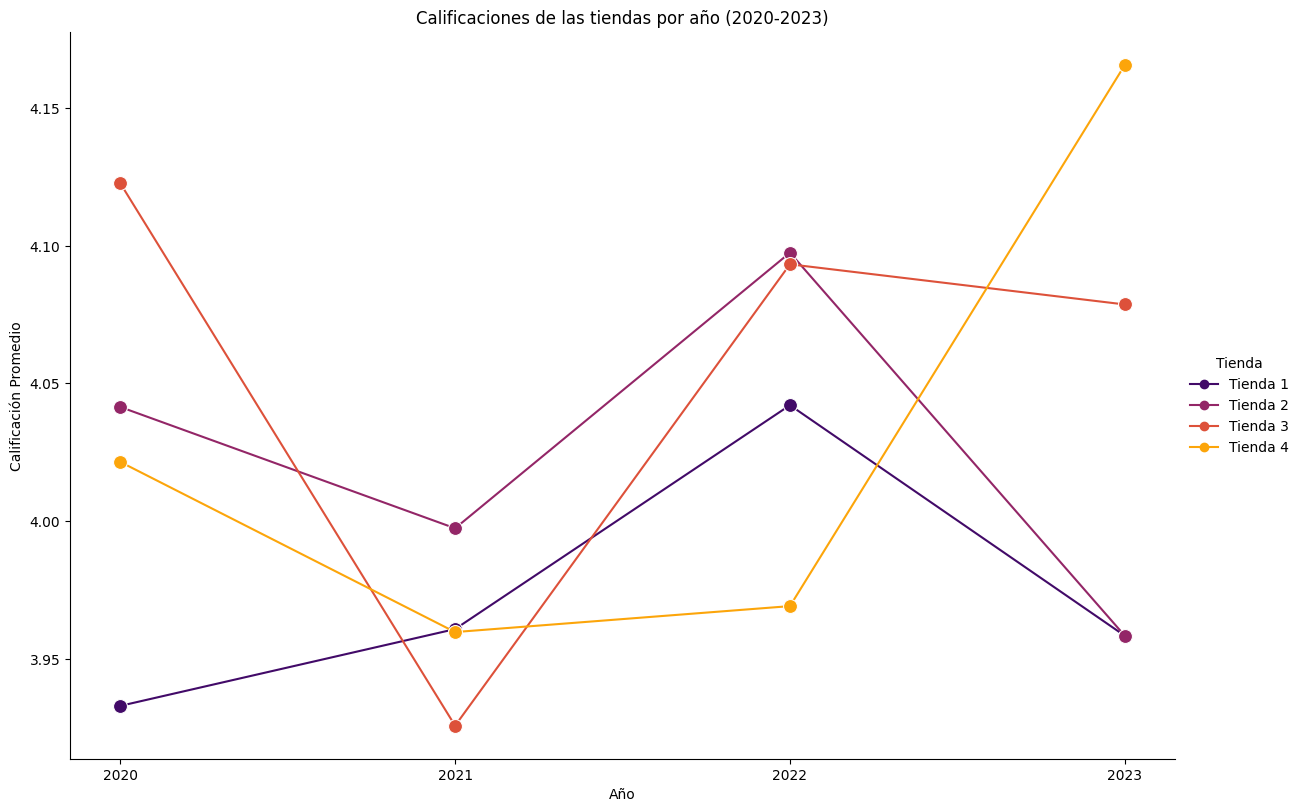

In [11]:
calificacion_por_tienda_anio = todas_tiendas.groupby(['Tienda','Año'])['Calificación'].mean().reset_index()
calificacion_por_tienda_anio.columns = ['Tienda', 'Año', 'Calificación Promedio']

plt.figure(figsize=(14, 8))
g = sns.relplot(data= calificacion_por_tienda_anio, x='Año', y='Calificación Promedio', hue= 'Tienda', palette= 'inferno',
            kind='line', marker='o',height=8, aspect=1.5)
for line in g.ax.lines:
    line.set_markersize(10)
g.ax.set_xticks(calificacion_por_tienda_anio['Año'].unique())
plt.title('Calificaciones de las tiendas por año (2020-2023)')

plt.show()

# 4. Productos más y menos vendidos

In [12]:
def top5_articulos_recaudacion(df,indicador):
  # Agrupar por tienda y producto, sumar precios y contar artículos
  top5 = df.groupby(['Tienda', 'Producto'])[['Precio']].agg(['sum', 'count']).reset_index()
  # Renombrar columnas
  top5.columns = ['Tienda', 'Producto', 'Recaudacion', 'Cantidad Vendida']
  # Ordenar por tienda y recaudación
  top5 = top5.sort_values(['Tienda', 'Cantidad Vendida'], ascending=[True, False])
  # Obtener los 5 productos principales por tienda

  if indicador:
    result = top5.groupby('Tienda').head(5)
  else:
    result = top5.groupby('Tienda').tail(5)

  return result

In [13]:
top5_articulos_mas_vendidos = top5_articulos_recaudacion(todas_tiendas, True)
top5_articulos_mas_vendidos

,Tienda,Producto,Recaudacion,Cantidad Vendida
1,Tienda 1,Armario,29462300.0,60
33,Tienda 1,Microondas,34761500.0,60
48,Tienda 1,TV LED UHD 4K,142150200.0,60
40,Tienda 1,Secadora de ropa,59062400.0,58
9,Tienda 1,Bloques de construcción,1865700.0,56
75,Tienda 2,Iniciando en programación,3127800.0,65
84,Tienda 2,Microondas,36192000.0,62
58,Tienda 2,Batería,46175300.0,61
72,Tienda 2,Guitarra acústica,18648400.0,58
89,Tienda 2,Pandereta,3725100.0,58


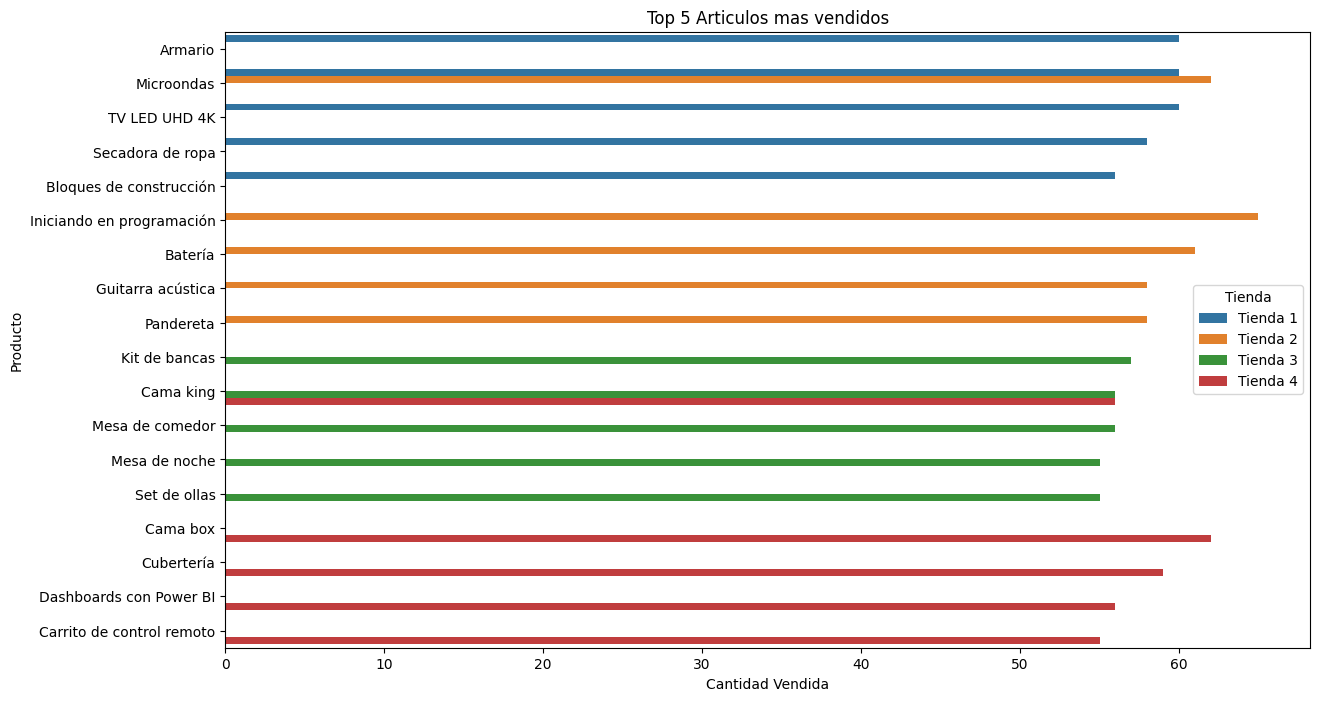

In [14]:
plt.figure(figsize=(14, 8))
sns.barplot(data=top5_articulos_mas_vendidos, y= 'Producto', x='Cantidad Vendida',hue='Tienda', palette= 'tab10')
plt.title('Top 5 Articulos mas vendidos')

plt.show()

In [15]:
top5_articulos_menos_vendidos = top5_articulos_recaudacion(todas_tiendas, False)
top5_articulos_menos_vendidos

,Tienda,Producto,Recaudacion,Cantidad Vendida
34,Tienda 1,Mochila,3867200.0,39
38,Tienda 1,Pandereta,2238900.0,36
37,Tienda 1,Olla de presión,2629300.0,35
4,Tienda 1,Auriculares con micrófono,4730800.0,33
13,Tienda 1,Celular ABXY,32651000.0,33
54,Tienda 2,Auriculares,3569600.0,37
95,Tienda 2,Sillón,8413500.0,35
74,Tienda 2,Impresora,10385300.0,34
82,Tienda 2,Mesa de comedor,8637500.0,34
77,Tienda 2,Juego de mesa,5811900.0,32


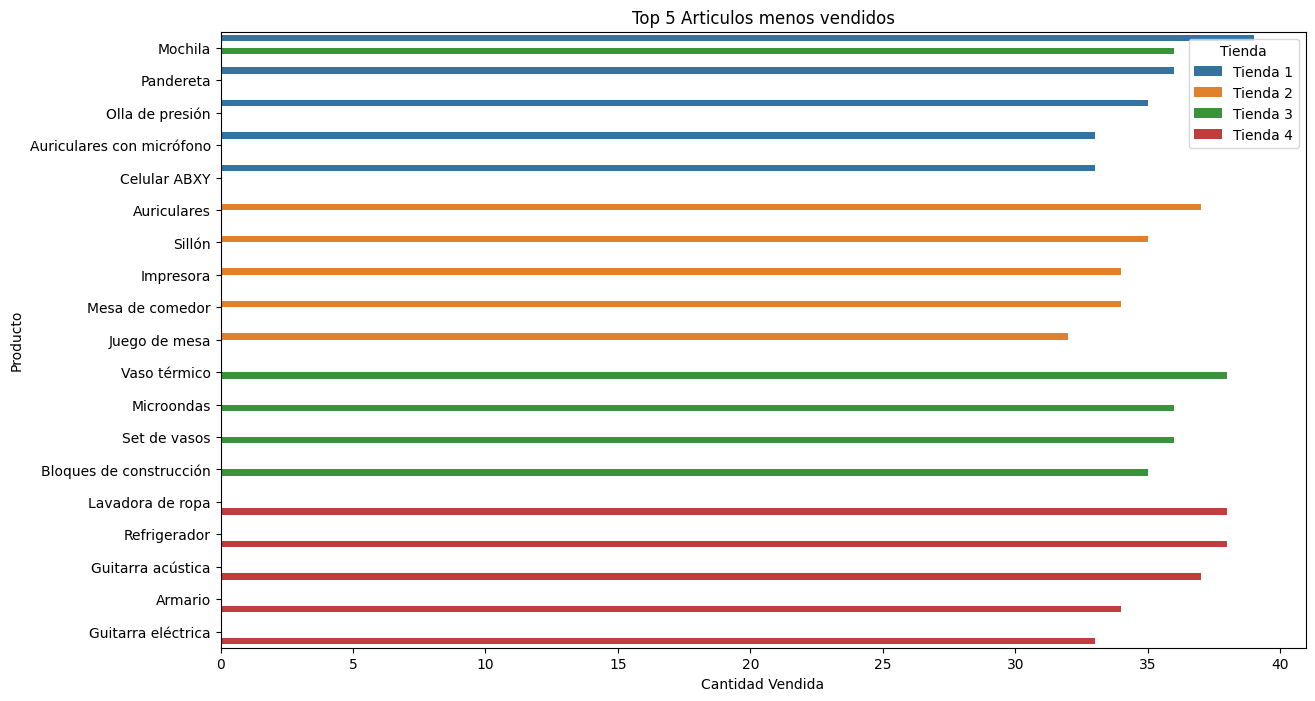

In [16]:
plt.figure(figsize=(14, 8))
sns.barplot(data=top5_articulos_menos_vendidos, y= 'Producto', x='Cantidad Vendida',hue='Tienda', palette= 'tab10')
plt.title('Top 5 Articulos menos vendidos')

plt.show()

# 5. Envío promedio por tienda

In [20]:
costo_envio_promedio = [tienda1['Costo de envío'].mean(), tienda2['Costo de envío'].mean(), tienda3['Costo de envío'].mean(), tienda4['Costo de envío'].mean()]
df_costo_envio_promedio = pd.DataFrame(costo_envio_promedio, columns= ['Costo de envio'], index= tiendas_nombres)
df_costo_envio_promedio

,Costo de envio
Tienda 1,26018.609580
Tienda 2,25216.235693
Tienda 3,24805.680373
Tienda 4,23459.457167


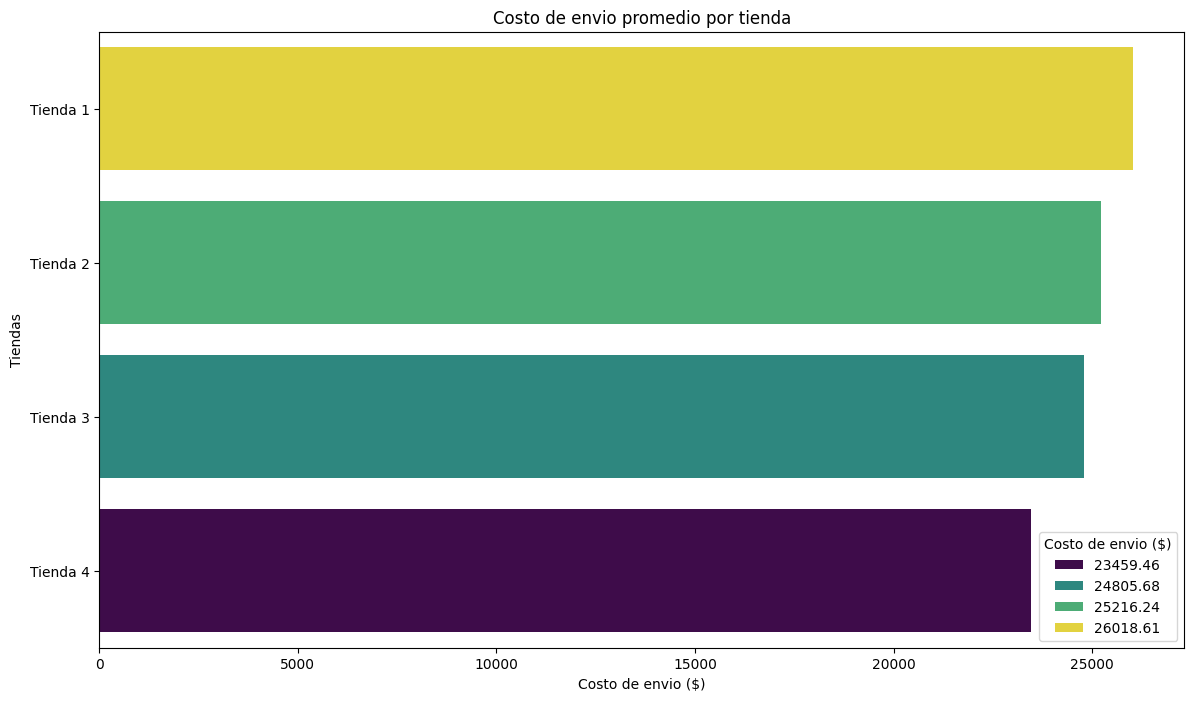

In [21]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_costo_envio_promedio, x='Costo de envio', y=df_costo_envio_promedio.index, palette = 'viridis', hue='Costo de envio')
handles, labels = ax.get_legend_handles_labels()
labels = [round(float(label), 2) for label in labels]
plt.xlabel('Costo de envio ($)')
plt.ylabel('Tiendas')
plt.legend(handles, labels, title='Costo de envio ($)')
plt.title('Costo de envio promedio por tienda')
plt.show()

# Analisis Final

Para determinar cual de las cuatro tiendas es la que se tiene que vender se detecta lo siguiente de las anteriores graficas:
<br>

1. **Ventas Totales:** La tienda 4 es la que presenta las ventas totales mas bajas y una dencencia decreciente durante los años.
<br>
2. **Ventas por categoria:** La tienda 4 cuenta con categorias que tiene menos ventas como lo son los electrodomesticos a comparacion de las demas tiendas, destaca en otras areas pero es la que menos ha recaudado de las 4 tiendas.
<br>
3. **Calificacion promedio:** La tienda 4 es una de las que tiene menor primedio en los años 2020-2022, durante el ultimo año 2023 incrementa considerablemente lo que afecta su promedio general, pero hay que considerar que los datos en 2023 solo son el primer trimestre.
<br>
4. **Costo de envio promedio:** La tienda 4 tiene el menor costo de envio, pero como se puede observar este factor no compensa el bajo rendimiento en los demas aspectos.


Debido a los puntos anteriores se da la recomendacion de **vender** la **Tienda 4**.

# Extra

In [92]:
import folium
from folium.plugins import HeatMap


In [93]:
df_total = pd.concat([tienda1,tienda2,tienda3,tienda4], ignore_index=True)
df_total = df_total.dropna(subset=['lat', 'lon'])
m = folium.Map(location=[4.5709, -74.2973], zoom_start=6)
heat_data = [[row['lat'], row['lon']] for _, row in df_total.iterrows()]
HeatMap(heat_data, radius=15).add_to(m)
m.save("mapa_calor_colombia.html")
m